In [311]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [313]:
train=pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_train.csv")
test=pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_test.csv")
df=pd.concat([train.reset_index(drop=True),
             test.reset_index(drop=True)])
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [315]:
df.describe()

,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


In [316]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [317]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
dtype: int64

In [318]:
df.rename(columns={"Model Name":"Model_Name",
                   "Screen Size":"Screen_Size",
                   "Operating System":"OS",
       "Operating System Version":"OS_Version"},inplace=True)
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [319]:
df.isnull().sum()

Manufacturer      0
Model_Name        0
Category          0
Screen_Size       0
Screen            0
CPU               0
RAM               0
 Storage          0
GPU               0
OS                0
OS_Version      170
Weight            0
Price             0
dtype: int64

In [320]:
df.drop_duplicates()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00
293,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00
294,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.00
295,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00


In [321]:
df['OS_Version'].value_counts()

OS_Version
10      1071
7         45
X          8
10 S       8
Name: count, dtype: int64

In [322]:
df['OS_Version']=df['OS_Version'].fillna(df['OS_Version'].mode()[0])

In [323]:
def order(x,num):
    return df[x].value_counts().head(num).index

laptop manufacturer

<Axes: title={'center': 'Popular Manufacturer of Laptops'}, xlabel='count', ylabel='Manufacturer'>

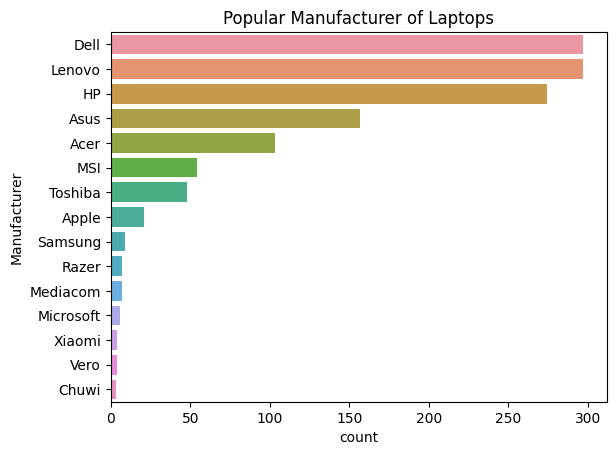

In [324]:
plt.title('Popular Manufacturer of Laptops')
sns.countplot(y=df['Manufacturer'],order=order('Manufacturer',15))

In [325]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Manufacturer']=lr.fit_transform(df['Manufacturer'])

In [326]:
print(lr.classes_)

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']


In [327]:
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [328]:
df.Model_Name.unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [329]:
df['Model_Name'].value_counts()

Model_Name
XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
SmartBook 130                            1
A541NA-GO342 (N3350/4GB/500GB/Linux)     1
17-X047na (i3-6006U/8GB/1TB/W10)         1
V310-15ISK (i5-6200U/4GB/1TB/FHD/No      1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
Name: count, Length: 617, dtype: int64

In [330]:
len(df['Model_Name'].value_counts())

617

In [331]:
 df.drop('Model_Name',axis=1, inplace=True)

**Category of laptops**

<Axes: title={'center': 'Laptop popularity by category'}, xlabel='count', ylabel='Category'>

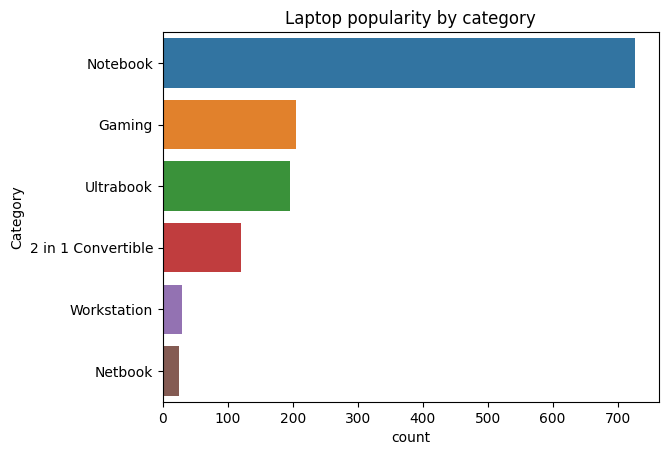

In [332]:
plt.title('Laptop popularity by category')
sns.countplot(y=df['Category'],order=order('Category',18))

In [333]:
df['Category'].replace({"Netbook":'Notebook'},inplace=True)

In [334]:
df["Category"].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [335]:
lr=LabelEncoder()
df["Category"]=lr.fit_transform(df["Category"])
# df['Category']=lr.fit_transform(df)

In [336]:
df['Screen_Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [337]:
df['Screen_Size']=df["Screen_Size"].str.replace('"','').astype('float')

In [338]:
df.head()

,Manufacturer,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,3,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,3,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,3,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


In [339]:
df.Screen.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [340]:
df["Touchscreen"]=df['Screen'].str.contains('Touchscreen', case=False).astype('int')

In [341]:
df["Touchscreen"].value_counts()

Touchscreen
0    1111
1     191
Name: count, dtype: int64

In [342]:
#IPS
df["IPS_panel"]=df['Screen'].str.contains('IPS', case=False).astype('int')

In [343]:
df["IPS_panel"].value_counts()

IPS_panel
0    937
1    365
Name: count, dtype: int64

In [344]:
#RETINA
df["Retina"]=df['Screen'].str.contains('Retina', case=False).astype('int')

In [345]:
df["Retina"].value_counts()

Retina
0    1285
1      17
Name: count, dtype: int64

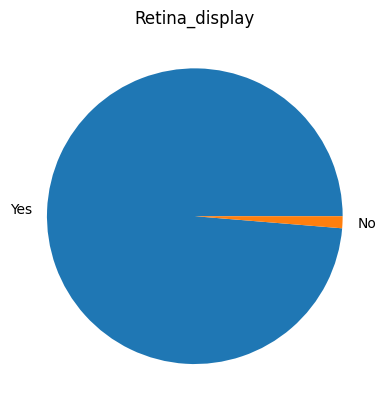

In [346]:
plt.title('Retina_display')
plt.pie(df['Retina'].value_counts(), labels=['Yes','No'])
plt.show()

In [347]:
df['Full_HD_display']=df['Screen'].str.contains('Full HD Screen')

In [348]:
plt.title('Full_HD_display')
plt.pie(df['Full_HD_display'].value_counts(),labels=['yes','no']),autopct='%.1f%',colors=['red','yellow']
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3903319661.py, line 2)

In [ ]:
df['xres']=df['Screen'].str.extract(r'(\d+)x\d+').astype('int')
df['xres']=df['Screen'].str.extract(r'\d+x(\d+)').astype('int')
df.drop('Screen',axis=1, inplace=True)

In [ ]:
df['PPI']=(((df['xres']**2+df['yres']**2)**0.5)/df['Screen_Size'])

In [ ]:
df.drop(['xres','yres'],axis=1,inplace=True)

In [ ]:
df['weight']=df['weight'].str.extract(r'(\d+\.?\d*)),astype('float')

In [ ]:
df['Weight']=df['Weight'].str.extract(r'(\d+\.?\d*)').astype('float')
n=df['GPU'].str.split('',n=1,expand=True)
df['GPU']=n[0]
df['GPU'].value_counts()

In [ ]:
lr=LabelEncoder()

In [ ]:
df['GPU']=lr.fit_transform(df['GPU'])

In [ ]:
df["RAM"]=df['RAM'].str.replace('GB','')
df['RAM']=df['RAM'].astype('int')

In [ ]:
df.drop('OS_Version',axis=1, inplace=True)

In [ ]:
df['RAM']=df['RAM'].str.replace('GB','')
df['RAM']=df['RAM'].astype('int')

In [ ]:
df.drop('OS_Version',axis=1,inplace=True)
lr=LabelEncoder()
df['OS']=lr.fit_transform(df['OS'])

In [ ]:
df.drop('OS_Version',axis=1, inplace=True)

In [ ]:
df['OS']=lr.fit_transform(df['OS'])

In [ ]:
lr=LabelEncoder()

In [ ]:
df['Pro_Name']=df['CPU'].apply([lambda x:''.join(x.split()[0:3])])

In [ ]:
df['Pro_Name'].head(10)

In [ ]:
lr=LabelEncoder()

In [ ]:
df['CPU']=lr.fit_transform(df['pro_Name'])

In [ ]:
df[' Storage']=df[' Storage'].str.replace('GB','')

In [ ]:
first=df[" Storage"].str.split("+",n=1,expand=True)

In [349]:
df['part1']=first[0]
df['part2']=first[1]

In [350]:
df['part1']=df['part1'].str.strip()
df['part2'].fillna('0',inplace=True)

In [351]:
df["Storage1_SSD"]=df["part1"].apply(lambda x: 1 if "SSD" in x else 0)

In [352]:
df["Storage1_HDD"]=df["part1"].apply(lambda x: 1 if "HDD" in x else 0)

In [353]:
df["part1"].apply(lambda x: 1 if "Hybrid" in x else 0)

0      0
1      0
2      0
3      0
4      0
      ..
320    0
321    0
322    0
323    0
324    0
Name: part1, Length: 1302, dtype: int64

In [354]:
  df["Storage1_Hybrid_Storage"]=df["part1"].apply(lambda x: 1 if 'Hybrid' in x else 0)

In [355]:
df["Storage2_SSD"]=df["part2"].apply(lambda x: 1 if "HDD" in x else 0)

In [356]:
df["Storage2_Flash_Storage"]=df["part2"].apply(lambda x: 1 if "Flash_Storage" in x else 0)

In [ ]:
df['part1']=df['part1'].str.replace(r'\D+',", regex=True).astype (int)

df['part2']=df['part2'].str.replace(r\D+", regex=True).astype(int) df['part1'].dtype

df["SSD"]=(df["part1"]*df["Storage1_SSD"] +df["part2"]*df["Storage2_SSD"])

df["HDD"]=(df["part1"]*df ["Storage1_HDD"] +df["Storage2_HDD"])

In [ ]:
df['part1']=df['part1'].str.replace("\D+",", regex=True).astype (int)

df['part2'] = df ['part2'].str.replace("\D+",", regex=True).astype(int) df['part1'].dtype

df["SSD"]=(df["part1"]*df ["Storage1_SSD"] +df["part2"]*df["Storage2_SSD"])

df["HDD"]=(df["part1"]*df ["Storage1_HDD"] +df["part2"]*df["Storage2_HDD"])

df["Flash_Storage"]=(df ["part 1"]*df["Storage1_Fla

In [ ]:
# Storage1_HDD', 'Storage1_Flash_Storage', 'Storage2_SSD', 'Storage2_HDD', 'Storage2_Flash_Storage', 'Storage1_Hybrid_Storage’,’Storage’],axis=1, inplace=True)

# df.head()

In [ ]:
df['part1']=df['part1'].str.replace(r'\D+', '', regex=True).astype(int)



df['part2'] = df['part2'].str.replace(r'\D+','', regex=True).astype(int)

df['part1'].dtype

In [ ]:
df["SSD"]=(df["part1"]*df["Storage1_SSD"]+df["part2"]*df["Storage2_SSD"])



df["HDD"]=(df["part1"]*df["Storage1_HDD"]+df["part2"]*df["Storage2_HDD"])

In [ ]:
df["Flash_Storage"]=(df["part1"]*df["Storage1_Flash_Storage"]+df["part2"]*df["Storage2_Flash_Storage"])



df["Hybrid_Storage"] = (df["part1"]*df["Storage1_Hybrid_Storage"]+df["part2"]*df["Storage1_Hybrid_Storage"])

In [ ]:
df.drop(columns=['part1', 'part2','Storage1_SSD','Storage1_HDD', 'Storage1_Flash_Storage', 'Storage2_SSD', 'Storage2_HDD', 'Storage2_Flash_Storage', 'Storage1_Hybrid_Storage’,’Storage’],axis=1,

inplace=True)

df.head()

In [ ]:
df['Part1']=df['Part1'].str.replace(r'\D+','',regex=True).astype(int)
df['Part2']=df['Part2'].str.replace(r'\D+','',regex=True).astype(int)
df['Part1'].dtype

df["SSD"]=(df["Part1"]*df["Storage1_SSD"]+df["Part2"]*df["Storage2_SSD"])
df["HDD"]=(df["Part1"]*df["Storage1_HDD"]+df["Part2"]*df["Storage2_HDD"])
df["Flash_Storage"]=(df["Part1"]*df["Storage1_Flash_Storage"]+df["Part2"]*df["Storage2_Flash_Storage"])
df["Hybrid_Storage"]=(df["Part1"]*df["Storage1_Hybrid_Storage"]+df["Part2"]*df["Storage1_Hybrid_Storage"])

df.drop(columns=['Part1','Part2','Storage1_SSD','Storage1_HDD','Storage1_Flash_Storage','Storage2_SSD','Storage2_HDD','Storage2_Flash_Storage','Storage1_Hybrid_Storage','Storage'],axis=1,inplace = True)
df.head()